<a href="https://colab.research.google.com/github/diegomrodrigues/transformers_experiments/blob/main/Rotary%20Positional%20Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

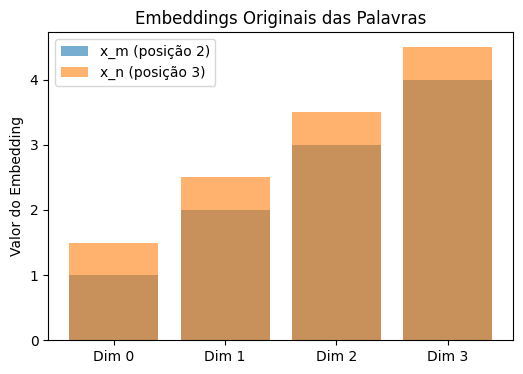

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Embeddings das palavras
x_m = np.array([1.0, 2.0, 3.0, 4.0])
x_n = np.array([1.5, 2.5, 3.5, 4.5])

# Plotando os embeddings
plt.figure(figsize=(6, 4))
plt.bar(range(len(x_m)), x_m, alpha=0.6, label='x_m (posição 2)')
plt.bar(range(len(x_n)), x_n, alpha=0.6, label='x_n (posição 3)')
plt.xticks(range(len(x_m)), ['Dim 0', 'Dim 1', 'Dim 2', 'Dim 3'])
plt.ylabel('Valor do Embedding')
plt.title('Embeddings Originais das Palavras')
plt.legend()
plt.show()


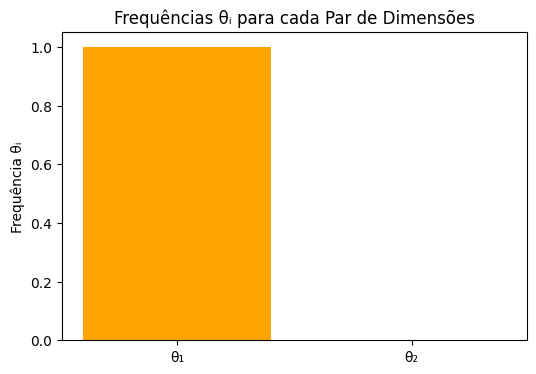

In [30]:
theta = np.array([1.0, 0.0001])
plt.figure(figsize=(6, 4))
plt.bar(['θ₁', 'θ₂'], theta, color='orange')
plt.ylabel('Frequência θᵢ')
plt.title('Frequências θᵢ para cada Par de Dimensões')
plt.show()


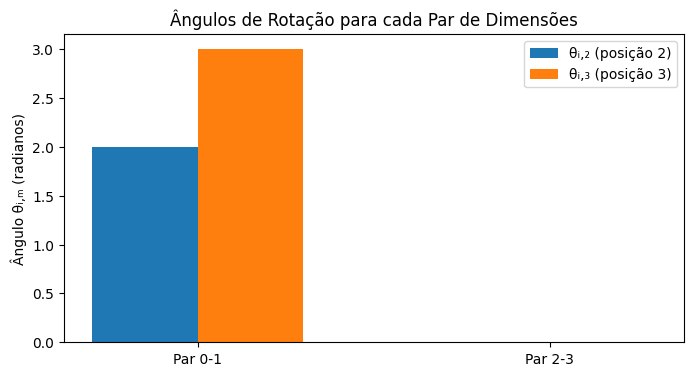

In [31]:
theta_m = np.array([2.0, 0.0002])
theta_n = np.array([3.0, 0.0003])

positions = ['Par 0-1', 'Par 2-3']
x = np.arange(len(positions))

plt.figure(figsize=(8, 4))
plt.bar(x - 0.15, theta_m, width=0.3, label='θᵢ,₂ (posição 2)')
plt.bar(x + 0.15, theta_n, width=0.3, label='θᵢ,₃ (posição 3)')
plt.xticks(x, positions)
plt.ylabel('Ângulo θᵢ,ₘ (radianos)')
plt.title('Ângulos de Rotação para cada Par de Dimensões')
plt.legend()
plt.show()


In [32]:
def rotation_matrix(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

# Matrizes de rotação para posição m = 2
R_m1 = rotation_matrix(theta_m[0])
R_m2 = rotation_matrix(theta_m[1])

# Matrizes de rotação para posição n = 3
R_n1 = rotation_matrix(theta_n[0])
R_n2 = rotation_matrix(theta_n[1])


In [33]:
x_m_pair1 = x_m[:2]
x_m_rotated_pair1 = R_m1 @ x_m_pair1

x_m_pair2 = x_m[2:]
x_m_rotated_pair2 = R_m2 @ x_m_pair2

x_m_rotated = np.concatenate([x_m_rotated_pair1, x_m_rotated_pair2])

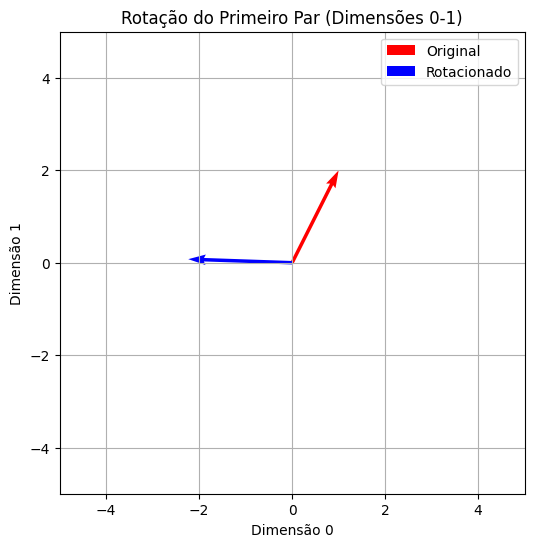

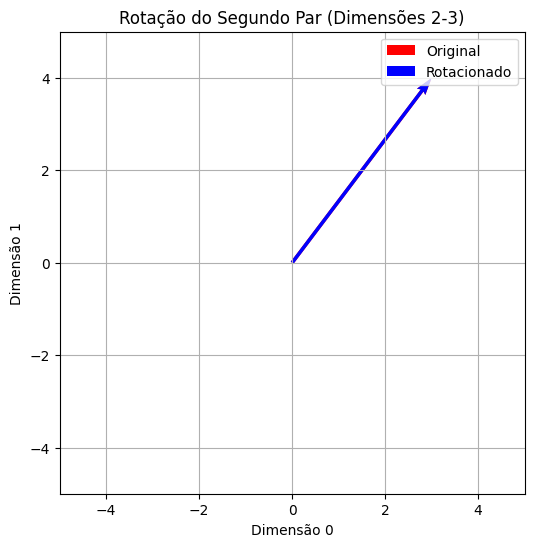

In [34]:
# Função para plotar vetores em 2D
def plot_vectors(vectors, labels, title):
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    colors = ['r', 'b']
    for i, vec in enumerate(vectors):
        ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color=colors[i], label=labels[i])
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    plt.xlabel('Dimensão 0')
    plt.ylabel('Dimensão 1')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Plotando antes e depois da rotação para o primeiro par
plot_vectors([x_m_pair1, x_m_rotated_pair1], ['Original', 'Rotacionado'], 'Rotação do Primeiro Par (Dimensões 0-1)')

# Plotando antes e depois da rotação para o segundo par
plot_vectors([x_m_pair2, x_m_rotated_pair2], ['Original', 'Rotacionado'], 'Rotação do Segundo Par (Dimensões 2-3)')


In [35]:
# Embedding original para n = 3
x_n = np.array([1.5, 2.5, 3.5, 4.5])

# Aplicando as rotações para n = 3
x_n_pair1 = x_n[:2]
x_n_rotated_pair1 = R_n1 @ x_n_pair1

x_n_pair2 = x_n[2:]
x_n_rotated_pair2 = R_n2 @ x_n_pair2

x_n_rotated = np.concatenate([x_n_rotated_pair1, x_n_rotated_pair2])


In [36]:
# Pontuação de atenção com RoPE
score_rope = np.dot(x_m_rotated, x_n_rotated)

# Pontuação de atenção sem RoPE
score_original = np.dot(x_m, x_n)

print(f"Pontuação sem RoPE: {score_original:.4f}")
print(f"Pontuação com RoPE: {score_rope:.4f}")


Pontuação sem RoPE: 35.0000
Pontuação com RoPE: 32.4328


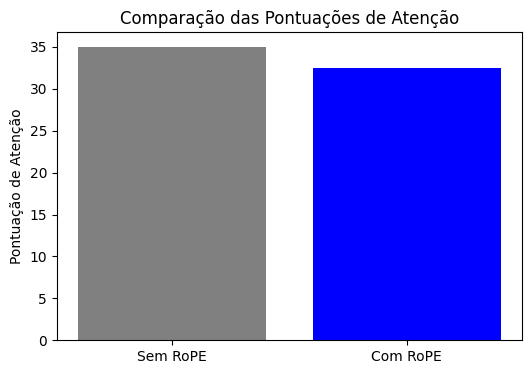

In [37]:
scores = [score_original, score_rope]
labels = ['Sem RoPE', 'Com RoPE']

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['gray', 'blue'])
plt.ylabel('Pontuação de Atenção')
plt.title('Comparação das Pontuações de Atenção')
plt.show()


In [38]:
distances = range(1, 6)
scores_rope = []
scores_original = []

for delta in distances:
    n = m + delta  # Posição n
    # Atualizando θ para a nova posição n
    theta_n = theta * n
    # Recalculando as matrizes de rotação para n
    R_n1 = rotation_matrix(theta_n[0])
    R_n2 = rotation_matrix(theta_n[1])
    # Aplicando as rotações
    x_n_pair1 = x_n[:2]
    x_n_rotated_pair1 = R_n1 @ x_n_pair1
    x_n_pair2 = x_n[2:]
    x_n_rotated_pair2 = R_n2 @ x_n_pair2
    x_n_rotated = np.concatenate([x_n_rotated_pair1, x_n_rotated_pair2])
    # Calculando as pontuações
    score_rope = np.dot(x_m_rotated, x_n_rotated)
    score_original = np.dot(x_m, x_n)
    scores_rope.append(score_rope)
    scores_original.append(score_original)

# Plotando o decaimento
plt.figure(figsize=(8, 4))
plt.plot(distances, scores_rope, marker='o', label='Com RoPE')
plt.plot(distances, scores_original, marker='x', label='Sem RoPE')
plt.xlabel('Distância |m - n|')
plt.ylabel('Pontuação de Atenção')
plt.title('Decaimento da Pontuação de Atenção com a Distância')
plt.legend()
plt.show()


NameError: name 'm' is not defined

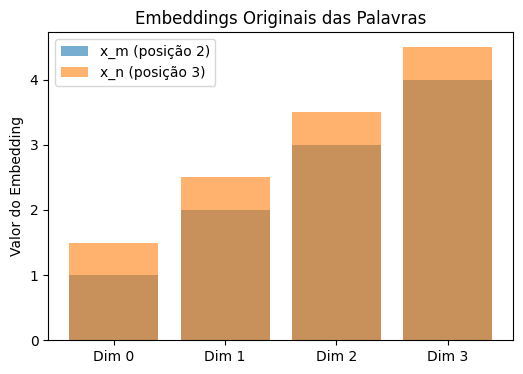

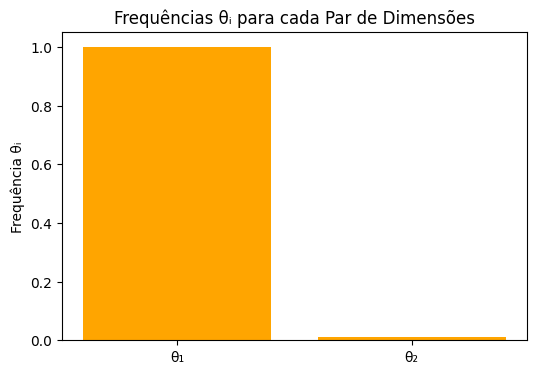

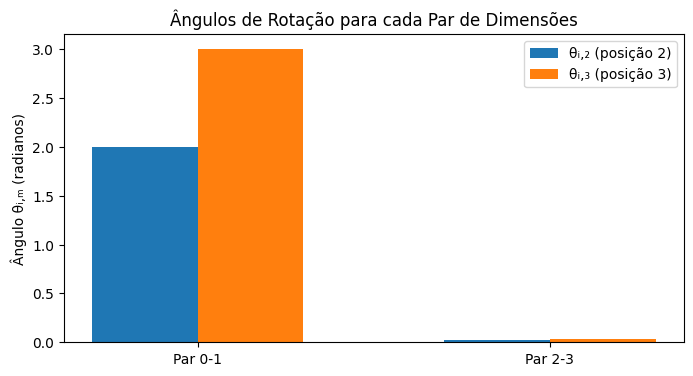

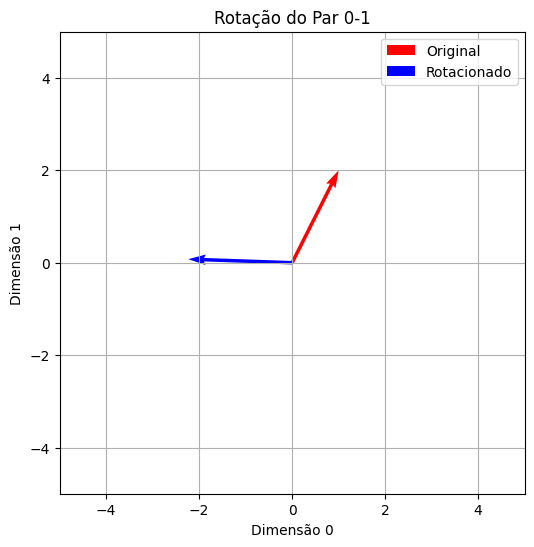

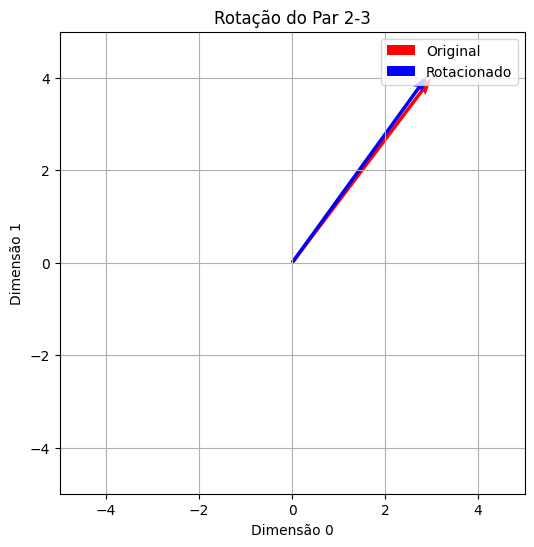

Pontuação sem RoPE: 35.0000
Pontuação com RoPE: 32.4363


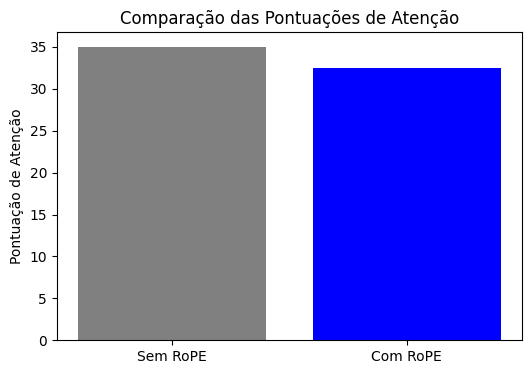

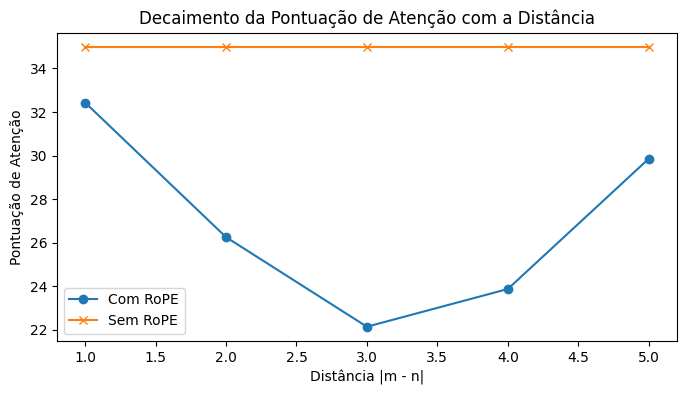

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros iniciais
d = 4  # Dimensão do embedding
m = 2  # Posição m
n = 3  # Posição n

# Embeddings das palavras
x_m = np.array([1.0, 2.0, 3.0, 4.0])
x_n = np.array([1.5, 2.5, 3.5, 4.5])

# 1. Visualizando os Embeddings Originais
plt.figure(figsize=(6, 4))
plt.bar(range(len(x_m)), x_m, alpha=0.6, label='x_m (posição 2)')
plt.bar(range(len(x_n)), x_n, alpha=0.6, label='x_n (posição 3)')
plt.xticks(range(len(x_m)), ['Dim 0', 'Dim 1', 'Dim 2', 'Dim 3'])
plt.ylabel('Valor do Embedding')
plt.title('Embeddings Originais das Palavras')
plt.legend()
plt.show()

# 2. Calculando as Frequências θ_i
theta = 10000 ** (-2 * np.arange(0, d // 2) / d)
theta_m = theta * m
theta_n = theta * n

# Visualizando as Frequências
plt.figure(figsize=(6, 4))
plt.bar(['θ₁', 'θ₂'], theta, color='orange')
plt.ylabel('Frequência θᵢ')
plt.title('Frequências θᵢ para cada Par de Dimensões')
plt.show()

# 3. Calculando os Ângulos de Rotação
positions = ['Par 0-1', 'Par 2-3']
x_indices = np.arange(len(positions))

plt.figure(figsize=(8, 4))
plt.bar(x_indices - 0.15, theta_m, width=0.3, label='θᵢ,₂ (posição 2)')
plt.bar(x_indices + 0.15, theta_n, width=0.3, label='θᵢ,₃ (posição 3)')
plt.xticks(x_indices, positions)
plt.ylabel('Ângulo θᵢ,ₘ (radianos)')
plt.title('Ângulos de Rotação para cada Par de Dimensões')
plt.legend()
plt.show()

# 4. Construindo as Matrizes de Rotação
def rotation_matrix(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

# Matrizes de rotação para m
R_m = [rotation_matrix(theta_m[i]) for i in range(len(theta_m))]

# Matrizes de rotação para n
R_n = [rotation_matrix(theta_n[i]) for i in range(len(theta_n))]

# 5. Aplicando as Matrizes de Rotação aos Embeddings
x_m_rotated_pairs = []
x_n_rotated_pairs = []

for i in range(len(theta)):
    x_m_pair = x_m[2*i:2*i+2]
    x_n_pair = x_n[2*i:2*i+2]
    x_m_rotated_pair = R_m[i] @ x_m_pair
    x_n_rotated_pair = R_n[i] @ x_n_pair
    x_m_rotated_pairs.append(x_m_rotated_pair)
    x_n_rotated_pairs.append(x_n_rotated_pair)
    # Visualização
    plot_vectors([x_m_pair, x_m_rotated_pair], ['Original', 'Rotacionado'], f'Rotação do Par {2*i}-{2*i+1}')

# Concatenando os pares rotacionados
x_m_rotated = np.concatenate(x_m_rotated_pairs)
x_n_rotated = np.concatenate(x_n_rotated_pairs)

# 6. Calculando a Pontuação de Atenção
score_rope = np.dot(x_m_rotated, x_n_rotated)
score_original = np.dot(x_m, x_n)

print(f"Pontuação sem RoPE: {score_original:.4f}")
print(f"Pontuação com RoPE: {score_rope:.4f}")

# Visualizando a Comparação das Pontuações
scores = [score_original, score_rope]
labels = ['Sem RoPE', 'Com RoPE']

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['gray', 'blue'])
plt.ylabel('Pontuação de Atenção')
plt.title('Comparação das Pontuações de Atenção')
plt.show()

# 7. Observando o Decaimento com a Distância
distances = range(1, 6)
scores_rope = []
scores_original = []

for delta in distances:
    n = m + delta
    theta_n = theta * n
    R_n = [rotation_matrix(theta_n[i]) for i in range(len(theta_n))]
    x_n_rotated_pairs = []
    for i in range(len(theta)):
        x_n_pair = x_n[2*i:2*i+2]
        x_n_rotated_pair = R_n[i] @ x_n_pair
        x_n_rotated_pairs.append(x_n_rotated_pair)
    x_n_rotated = np.concatenate(x_n_rotated_pairs)
    score_rope = np.dot(x_m_rotated, x_n_rotated)
    score_original = np.dot(x_m, x_n)
    scores_rope.append(score_rope)
    scores_original.append(score_original)

# Plotando o decaimento
plt.figure(figsize=(8, 4))
plt.plot(distances, scores_rope, marker='o', label='Com RoPE')
plt.plot(distances, scores_original, marker='x', label='Sem RoPE')
plt.xlabel('Distância |m - n|')
plt.ylabel('Pontuação de Atenção')
plt.title('Decaimento da Pontuação de Atenção com a Distância')
plt.legend()
plt.show()
